In [1]:
import xarray as xr
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt
import pandas as pd
from netCDF4 import Dataset as netcdf

In [2]:
from affine import Affine
tif = xr.open_rasterio('/home/s1423313/Documents/Svalbard/Regions/Region_Masks/07_rgi60_Svalbard_corr_land_R1.tif')

In [7]:
ncfile = netcdf('/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/MARv3.11.2-6km-daily-ERA5-2001.nc')
ncfile.variables
#ds= xr.open_dataset('/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/MARv3.11.2-6km-daily-ERA5-2001.nc')
#ds

OrderedDict([('X20_340', <class 'netCDF4._netCDF4.Variable'>
              float32 X20_340(X20_340)
                  units: km
                  long_name: x
                  point_spacing: even
                  axis: X
              unlimited dimensions: 
              current shape = (321,)
              filling off), ('Y20_218', <class 'netCDF4._netCDF4.Variable'>
              float32 Y20_218(Y20_218)
                  units: km
                  long_name: y
                  point_spacing: even
                  axis: Y
              unlimited dimensions: 
              current shape = (199,)
              filling off), ('LON', <class 'netCDF4._netCDF4.Variable'>
              float32 LON(Y20_218, X20_340)
                  units: degrees
                  long_name: Longitude
                  history: From ICE.x42.2020.01.01-05
              unlimited dimensions: 
              current shape = (199, 321)
              filling off), ('LAT', <class 'netCDF4._netCDF4.Variable'>

In [5]:
ncfile = netcdf('/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/Svalbard_Masked/Svalbard_MR2.nc')
ncfile.variables

OrderedDict([('time', <class 'netCDF4._netCDF4.Variable'>
              float64 time(time)
              unlimited dimensions: 
              current shape = (6939,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('smb_mean', <class 'netCDF4._netCDF4.Variable'>
              float64 smb_mean(time)
              unlimited dimensions: 
              current shape = (6939,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('rf_mean', <class 'netCDF4._netCDF4.Variable'>
              float64 rf_mean(time)
              unlimited dimensions: 
              current shape = (6939,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('sf_mean', <class 'netCDF4._netCDF4.Variable'>
              float64 sf_mean(time)
              unlimited dimensions: 
              current shape = (6939,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
        

In [35]:
def MARplot(matfile,ncfile,title,npng):
    ds= xr.open_dataset(ncfile)
    ds['time']= pd.date_range('2001-01-01','2019-12-31')
    SMB= ds.smb_mean
    RF=ds.rf_mean
    RU=ds.ru_mean
    SF=ds.sf_mean
    SU=ds.su_mean
    SH=ds.sh_mean

    matdata=io.loadmat(matfile)
    elevation = matdata['Tmsr'][0]
    t = matdata['time'][0]
    timepy= pd.to_datetime(t-719529, unit='D')
    E_ds = xr.Dataset(data_vars = dict(elev= (["t"],elevation)),coords=dict(t=timepy))

    labels = ['Elevation Change CryoSAT2','Elevation Change MAR', 'MAR: SMB(cumulative)','MAR: RF','MAR: SF','MAR: SU','MAR: RU']
    fig, (ax1, ax2, ax3,ax4) = plt.subplots(4,figsize=(18,10), sharex=True)
    plt.suptitle(title, fontsize=16)

    color = 'tab:red'
    color2 = 'tab:cyan'
    ax1.set_ylabel('elevation[m]', color=color, fontsize=14)
    ax1.plot(E_ds.t, E_ds.elev, color=color)
    ax1.plot(SH.time.sel(time=slice('2010-07-18','2019-12-31')), SH.sel(time=slice('2010-07-18','2019-12-31')).cumsum(), color=color2)

    color = 'tab:blue'
    ax2.set_ylabel('kg m$^{2}$', color=color, fontsize=14)  # we already handled the x-label with ax1
    ax2.plot(SMB.time.sel(time=slice('2010-07-18','2019-12-31')), SMB.sel(time=slice('2010-07-18','2019-12-31')).cumsum(), color=color)

    color = 'tab:green'
    color2= 'tab:purple'
    ax3.set_ylabel('mmWE/day', color=color, fontsize=14)  
    ax3.plot(RF.time.sel(time=slice('2010-07-18','2019-12-31')), RF.sel(time=slice('2010-07-18','2019-12-31')), color=color)
    ax3.plot(SF.time.sel(time=slice('2010-07-18','2019-12-31')), SF.sel(time=slice('2010-07-18','2019-12-31')), color=color2)

    color = 'tab:brown'
    
    ax4.set_ylabel('mmWE/day', color=color, fontsize=14)  
    ax4.plot(SU.time.sel(time=slice('2010-07-18','2019-12-31')), SU.sel(time=slice('2010-07-18','2019-12-31')), color=color)
    ax5 = ax4.twinx()
    color= 'tab:orange'
    ax5.set_ylabel('mmWE/day', color=color, fontsize=14)
    ax5.plot(RU.time.sel(time=slice('2010-07-18','2019-12-31')), RU.sel(time=slice('2010-07-18','2019-12-31')), color=color)

    
    fig.legend(labels)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
    plt.savefig(npng)
    plt.show()
   

In [50]:
ds= xr.open_dataset('/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/Svalbard_Masked/Svalbard_MR2.nc')
ds['time']= pd.date_range('2001-01-01','2019-12-31')
RU= ds.ru_mean
RU.sel(time=slice('2010-07-18','2019-12-31'))
       



<xarray.DataArray 'ru_mean' (time: 3454)>
array([4.129164e+35, 4.129164e+35, 4.129164e+35, ..., 4.129164e+35,
       4.129164e+35, 4.129164e+35])
Coordinates:
  * time     (time) datetime64[ns] 2010-07-18 2010-07-19 ... 2019-12-31

In [ ]:
for i in range(1,7):
    MARplot('/geos/d14/CS2/dhdt/Timeseries/Svalbard_LR'+str(i)+'_MF/tmsr_45_90_07_rgi60_Svalbard_corr_land_R'+str(i)+'.mat','/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/Svalbard_Masked/Svalbard_LR'+str(i)+'.nc','Svalbard Land R'+str(i),'Svalbard_LR'+str(i)+'.png')


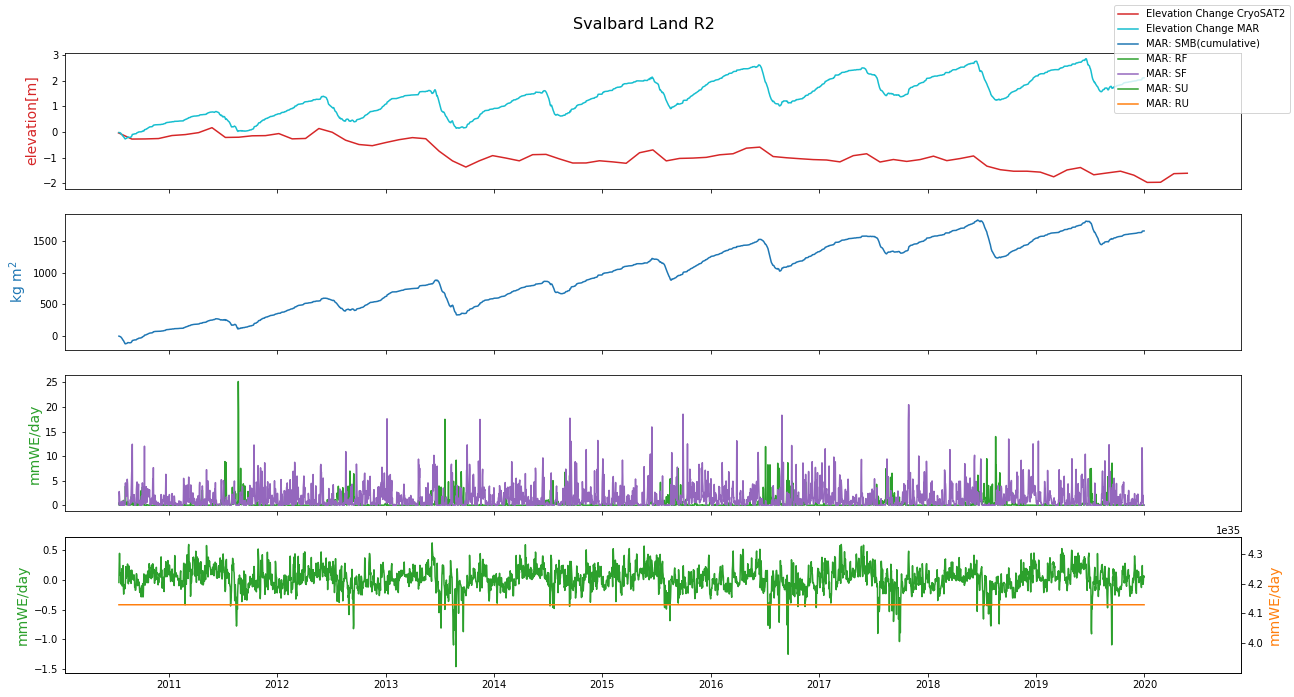

In [36]:
for i in range(2,3):
    MARplot('/geos/d14/CS2/dhdt/Timeseries/Svalbard_MR'+str(i)+'_MF/tmsr_45_90_07_rgi60_Svalbard_corr_marine_R'+str(i)+'.mat','/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/Svalbard_Masked/Svalbard_MR'+str(i)+'.nc','Svalbard Land R'+str(i),'Svalbard_MR'+str(i)+'.png')


In [39]:
def MARplot(matfile,ncfile,title,npng):
    ds= xr.open_dataset(ncfile)
    ds['time']= pd.date_range('2001-01-01','2019-12-31')
    SMB= ds.smb_mean
    SH=ds.sh_mean

    matdata=io.loadmat(matfile)
    elevation = matdata['Tmsr'][0]
    t = matdata['time'][0]
    timepy= pd.to_datetime(t-719529, unit='D')
    E_ds = xr.Dataset(data_vars = dict(elev= (["t"],elevation)),coords=dict(t=timepy))

    labels = ['Elevation Change CryoSAT2','Elevation Change MAR', 'MAR: SMB(cumulative)']
    fig, (ax1, ax2) = plt.subplots(2,figsize=(18,10), sharex=True)
    plt.suptitle(title, fontsize=16)

    color = 'tab:red'
    color2 = 'tab:cyan'
    ax1.set_ylabel('elevation[m]', color=color, fontsize=14)
    ax1.plot(E_ds.t, E_ds.elev, color=color)
    ax1.plot(SH.time.sel(time=slice('2010-07-16','2019-12-31')), SH.sel(time=slice('2010-07-16','2019-12-31')).cumsum(), color=color2)
    

    color = 'tab:blue'
    ax2.set_ylabel('kg m$^{2}$', color=color, fontsize=14)  # we already handled the x-label with ax1
    ax2.plot(SMB.time.sel(time=slice('2010-07-16','2019-12-31')), SMB.sel(time=slice('2010-07-16','2019-12-31')).cumsum(), color=color)

    
    fig.legend(labels)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
    plt.savefig(npng)
    plt.show()

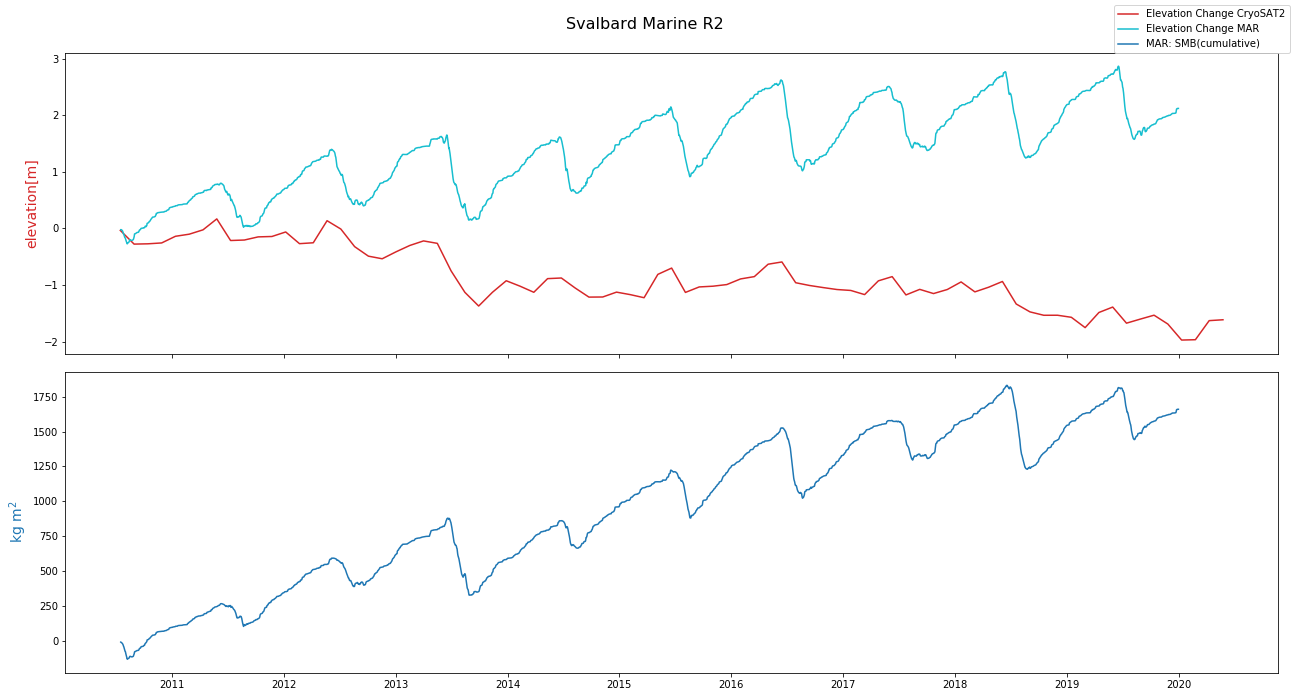

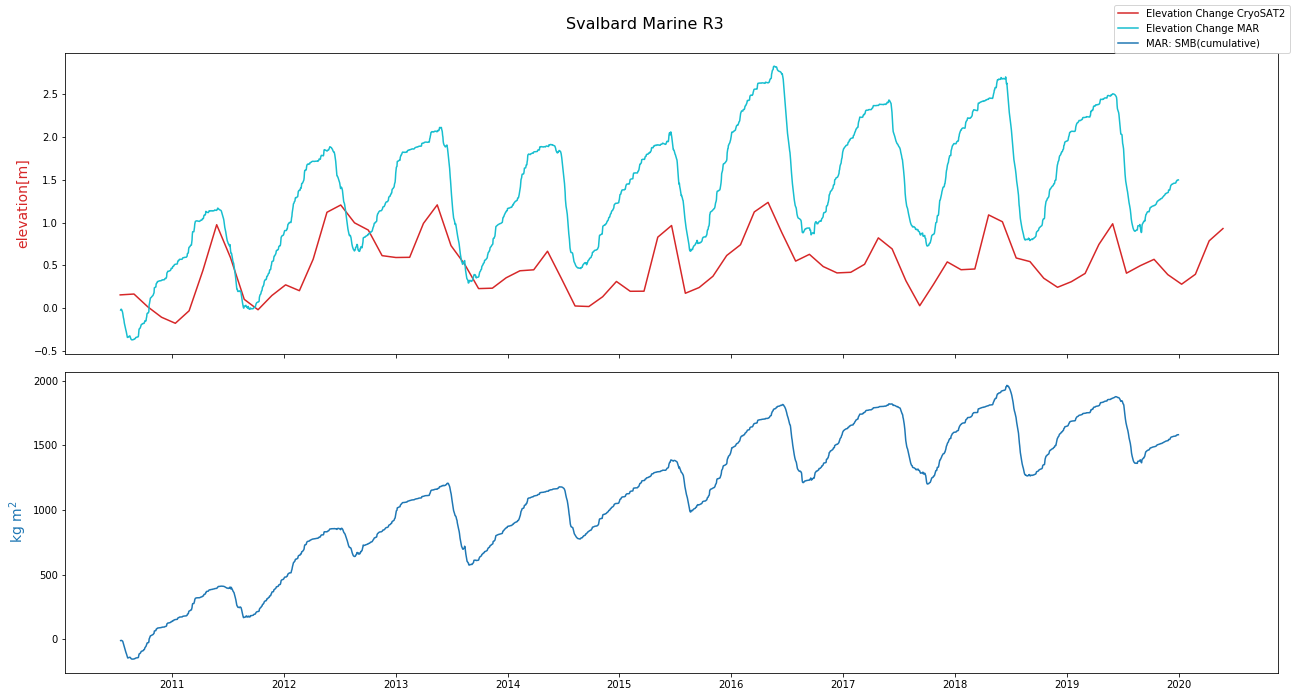

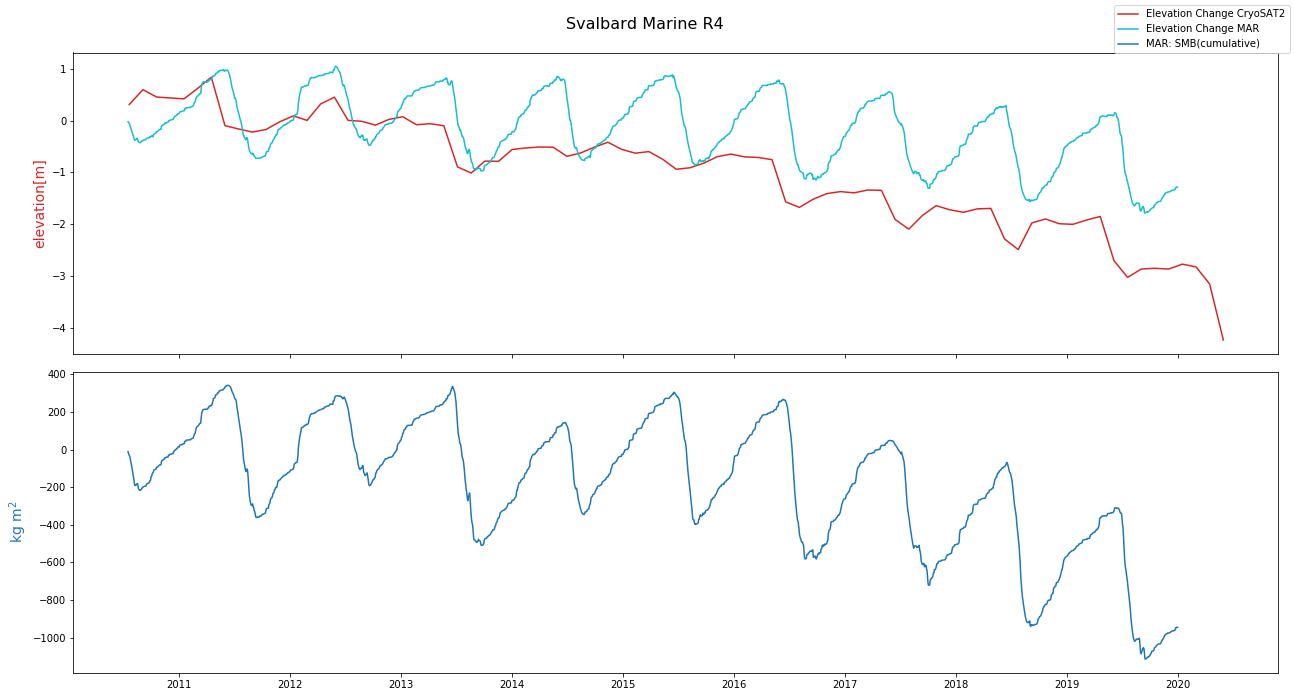

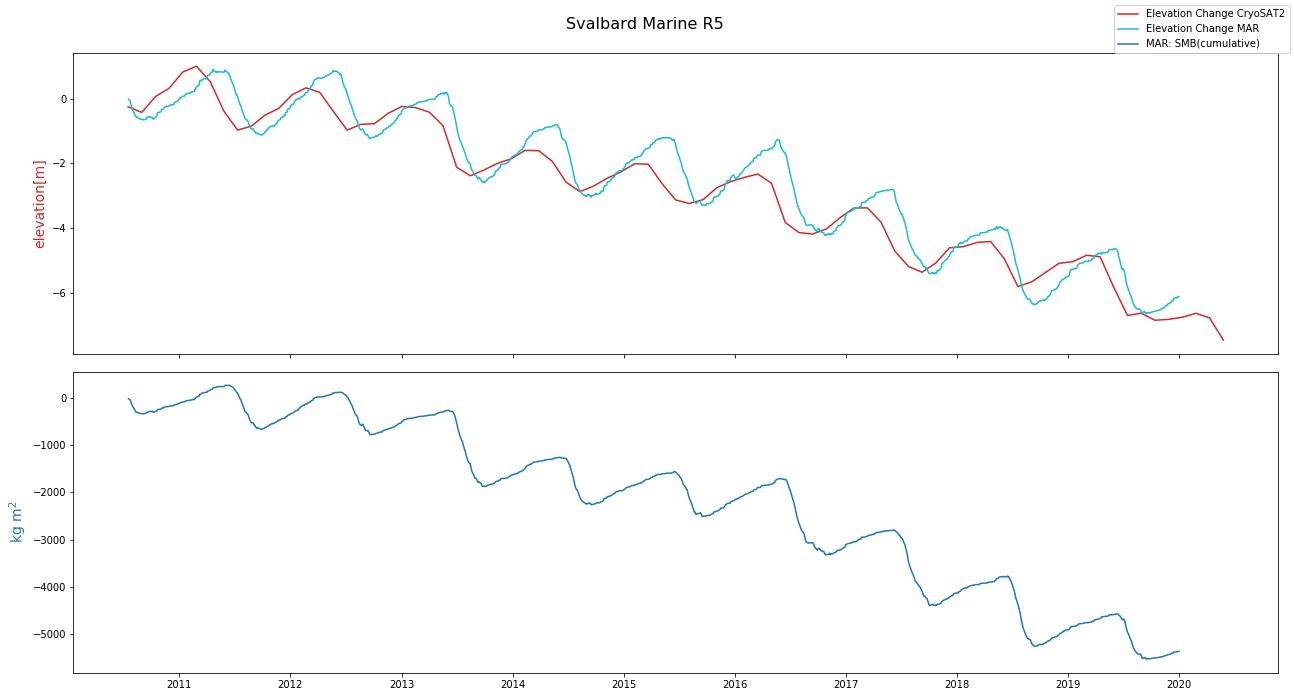

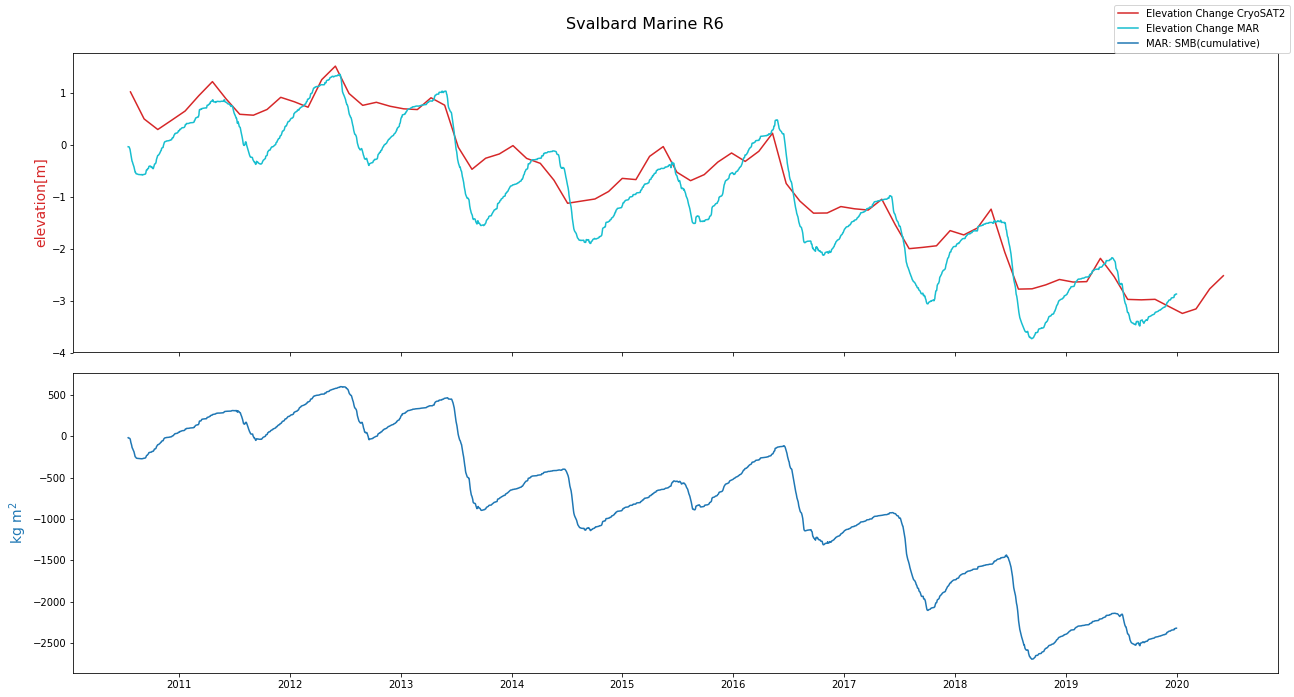

In [41]:
for i in range(2,7):
    MARplot('/geos/d14/CS2/dhdt/Timeseries/Svalbard_MR'+str(i)+'_MF/tmsr_45_90_07_rgi60_Svalbard_corr_marine_R'+str(i)+'.mat','/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/Svalbard_Masked/Svalbard_MR'+str(i)+'.nc','Svalbard Marine R'+str(i),'Svalbard_SMBEVEL_MR'+str(i)+'.png')


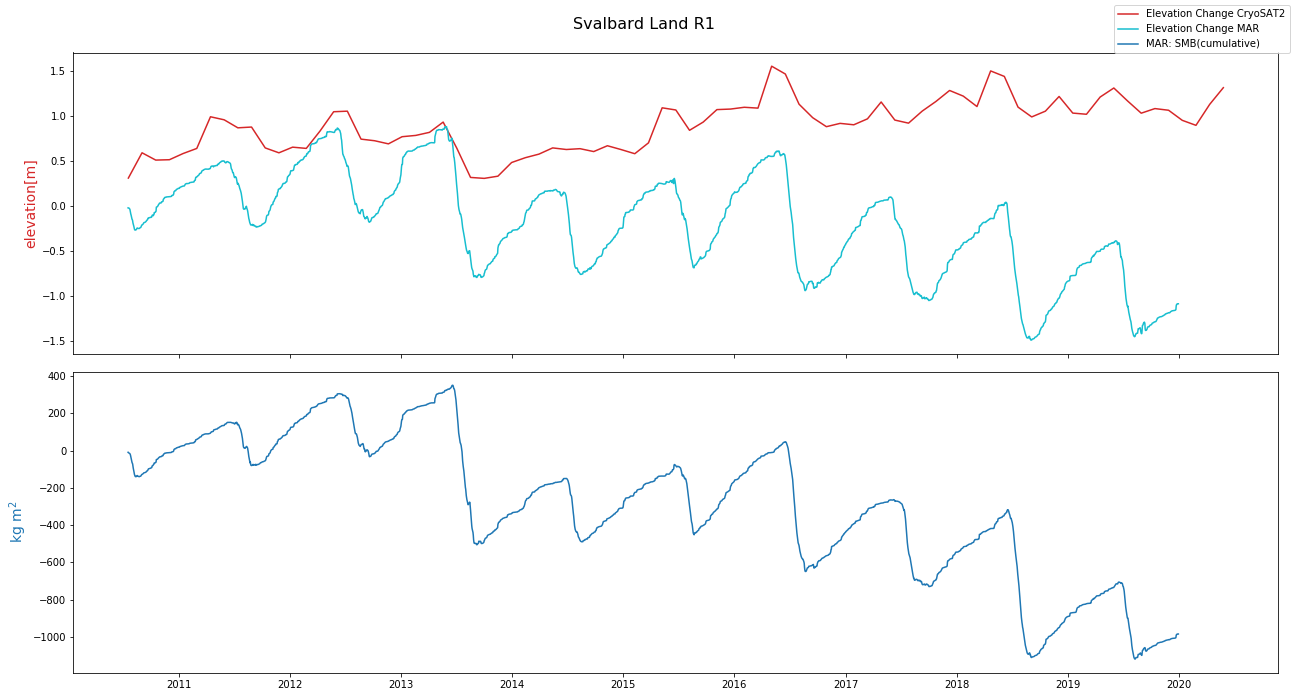

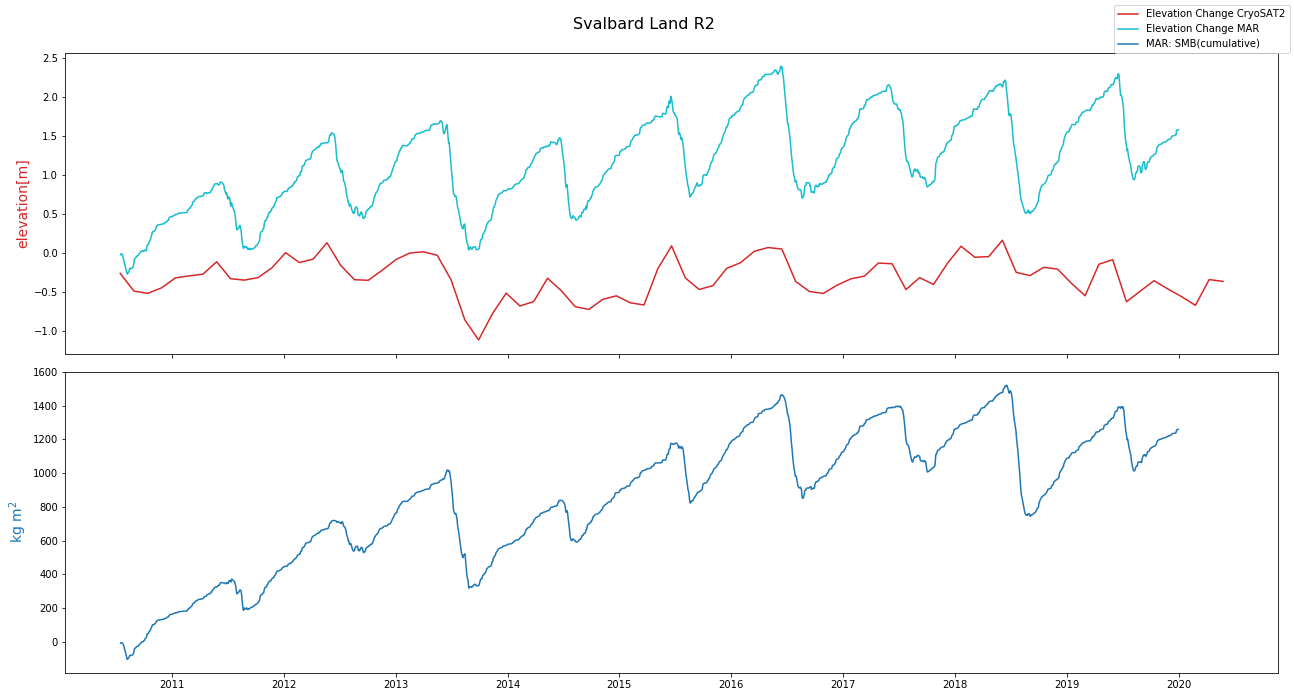

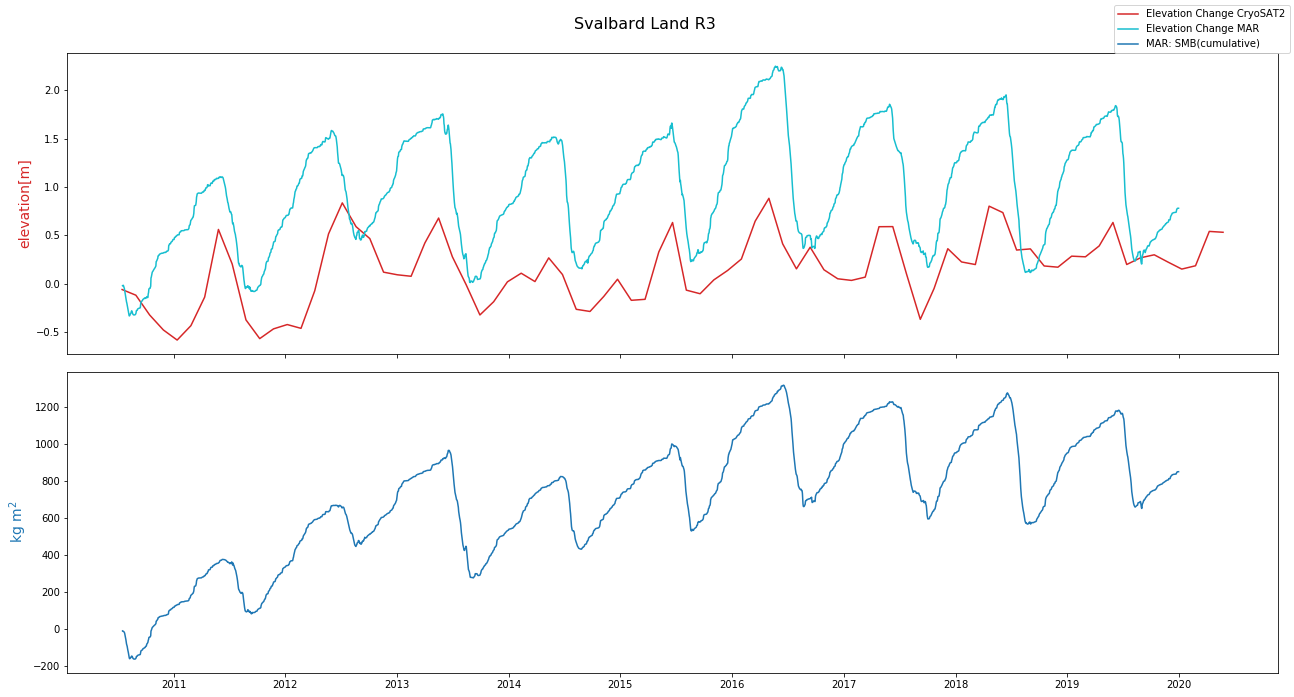

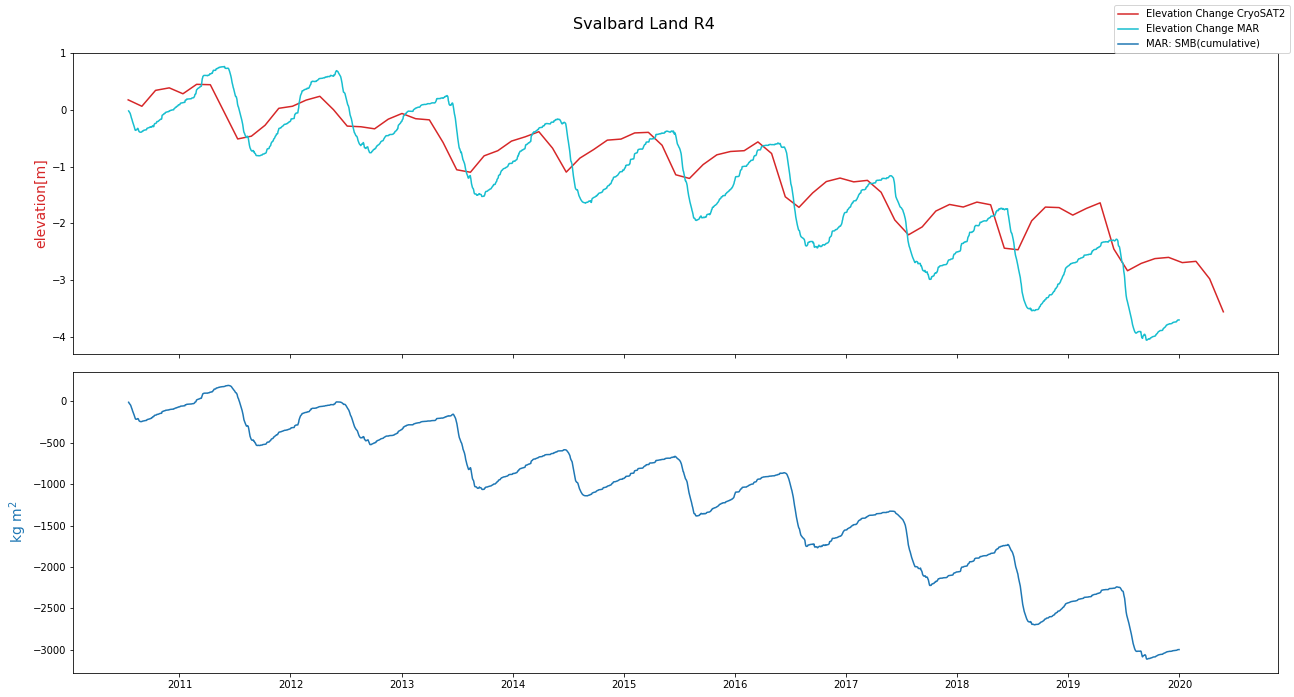

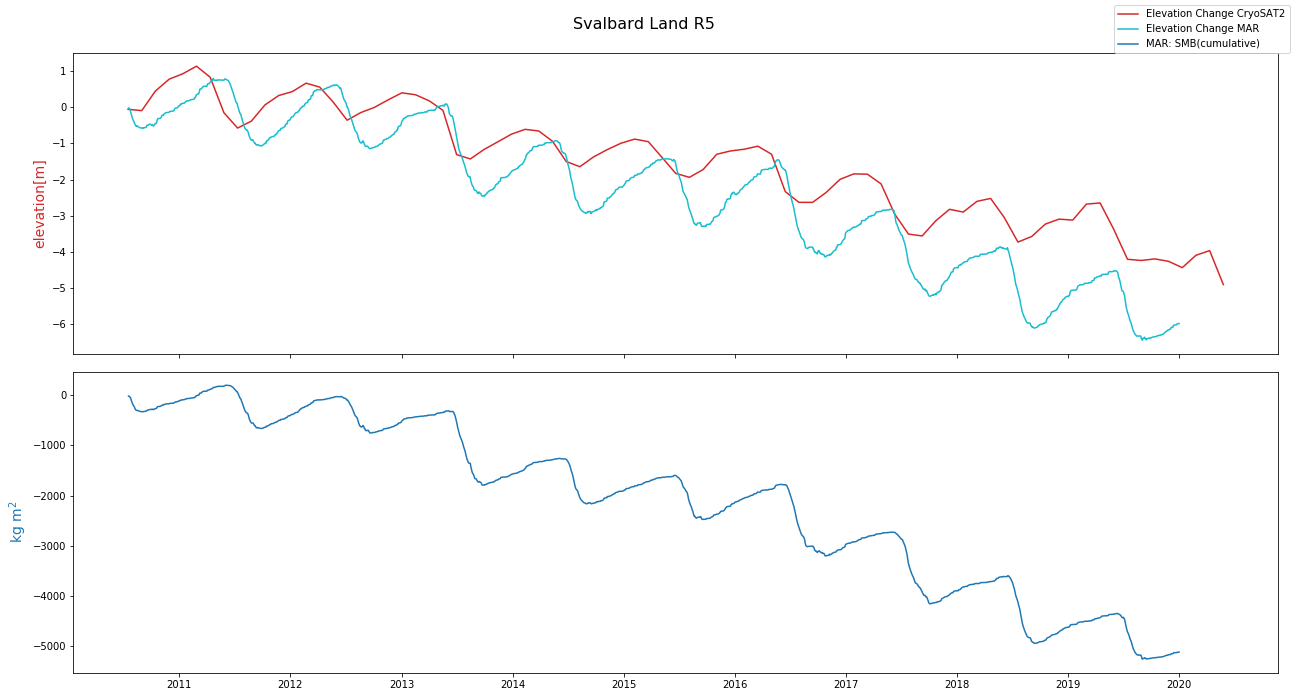

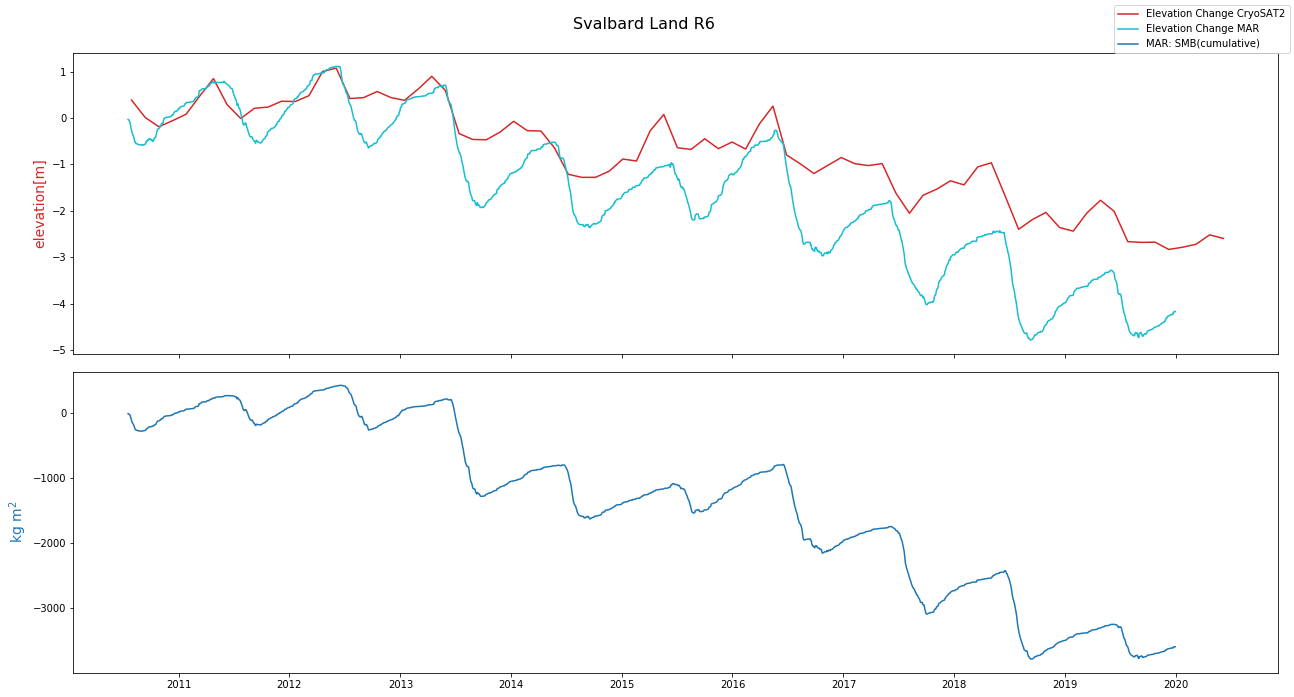

In [42]:
for i in range(1,7):
    MARplot('/geos/d14/CS2/dhdt/Timeseries/Svalbard_LR'+str(i)+'_MF/tmsr_45_90_07_rgi60_Svalbard_corr_land_R'+str(i)+'.mat','/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/Svalbard_Masked/Svalbard_LR'+str(i)+'.nc','Svalbard Land R'+str(i),'Svalbard_SMBEVEL_LR'+str(i)+'.png')


In [38]:
def MARplot_multi(matfile,ncfile,title,npng):

            ds= xr.open_dataset(ncfile)
            ds['time']= pd.date_range('2001-01-01','2019-12-31')
            SMB= ds.smb_mean
            SH=ds.sh_mean

            matdata=io.loadmat(matfile)
            elevation = matdata['Tmsr'][0]
            t = matdata['time'][0]
            timepy= pd.to_datetime(t-719529, unit='D')
            E_ds = xr.Dataset(data_vars = dict(elev= (["t"],elevation)),coords=dict(t=timepy))
    
            Diff_SH = E_ds.elev.sel(t=slice('2010-07-16','2019-12-31')) - SH.interp(time= E_ds.t)
            Diff_SH_time = Diff_SH.t

    labels = ['Elevation Change CryoSAT2','Elevation Change MAR',  'MAR: SMB(cumulative)','Difference',]
    fig, (ax1, ax2) = plt.subplots(2,figsize=(18,10), sharex=True)
    plt.suptitle(title, fontsize=16)

    color = 'tab:red'
    color2 = 'tab:cyan'
    ax1.set_ylabel('elevation[m]', color=color, fontsize=14)
    ax1.plot(E_ds.t, E_ds.elev, color=color)
    ax1.plot(SH.time.sel(time=slice('2010-07-16','2019-12-31')), SH.sel(time=slice('2010-07-16','2019-12-31')).cumsum(), color=color2)
    ax3=ax1.twinx()
    ax3.plot( Diff_SH_time,Diff_SH,color = 'tab:purple')
    
    color = 'tab:blue'
    ax2.set_ylabel('kg m$^{2}$', color=color, fontsize=14)  # we already handled the x-label with ax1
    ax2.plot(SMB.time.sel(time=slice('2010-07-16','2019-12-31')), SMB.sel(time=slice('2010-07-16','2019-12-31')).cumsum(), color=color)

    
    fig.legend(labels)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # otherwise the right y-label is slightly clipped
    plt.savefig(npng)
    plt.show()

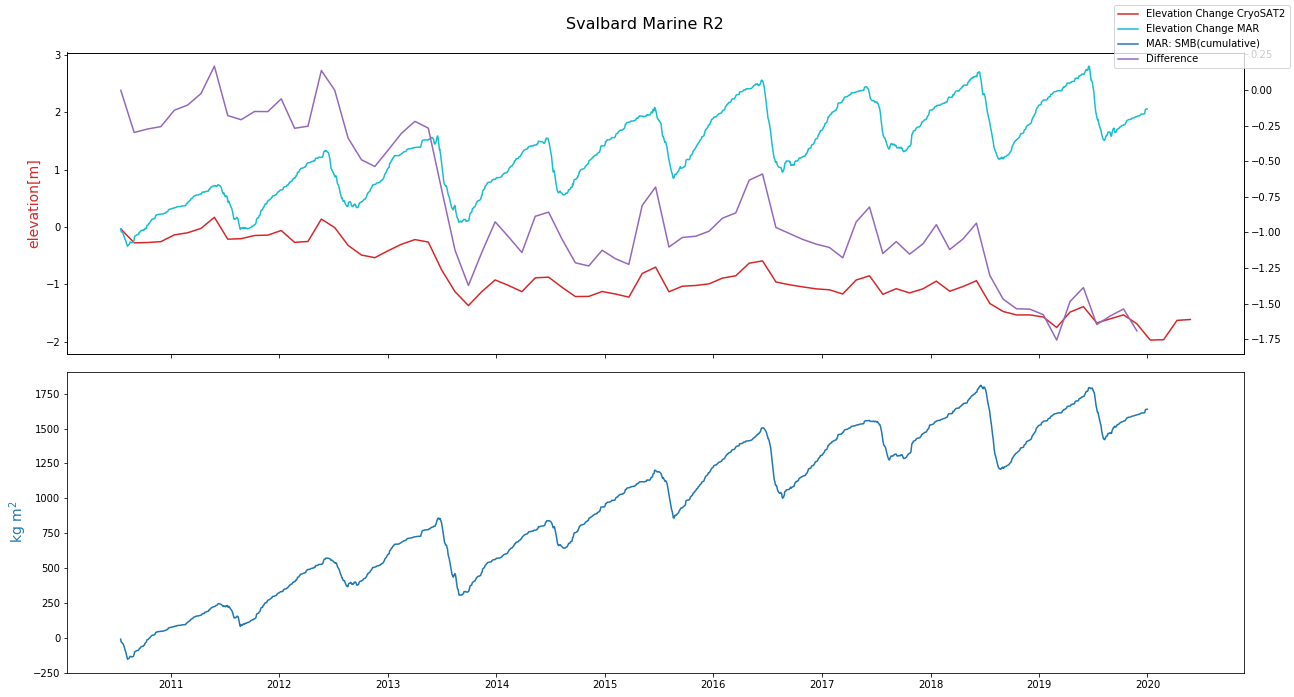

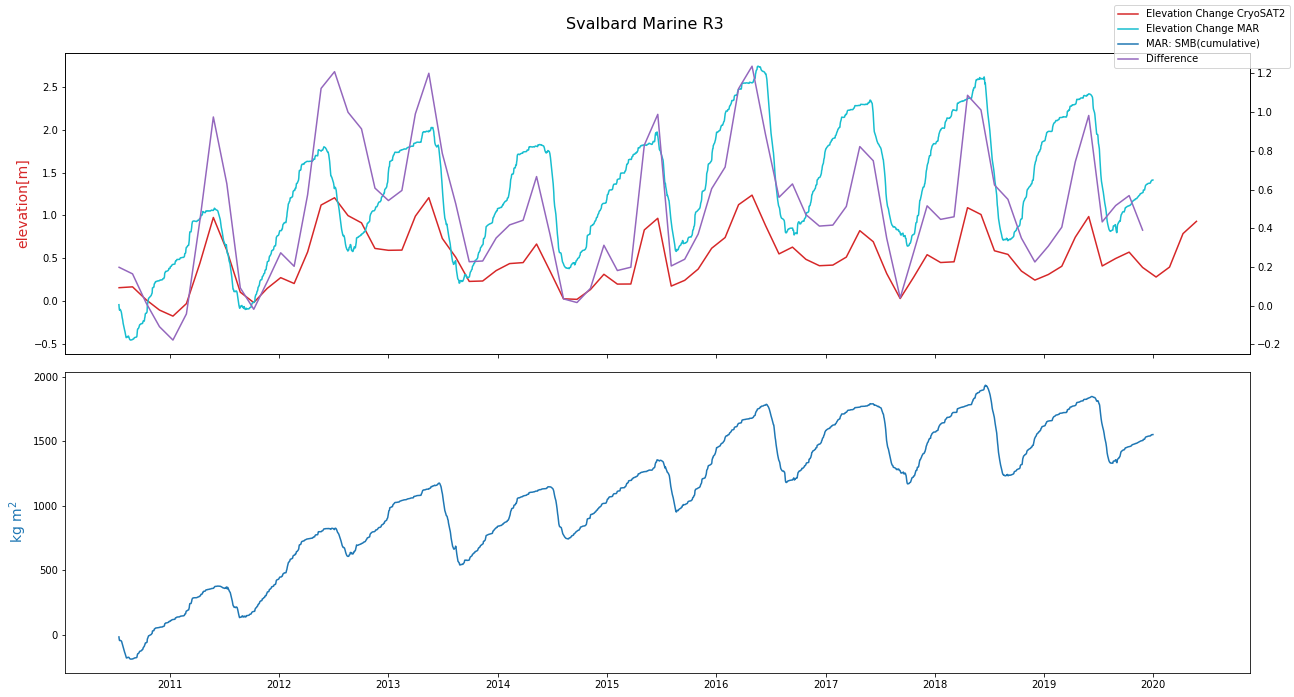

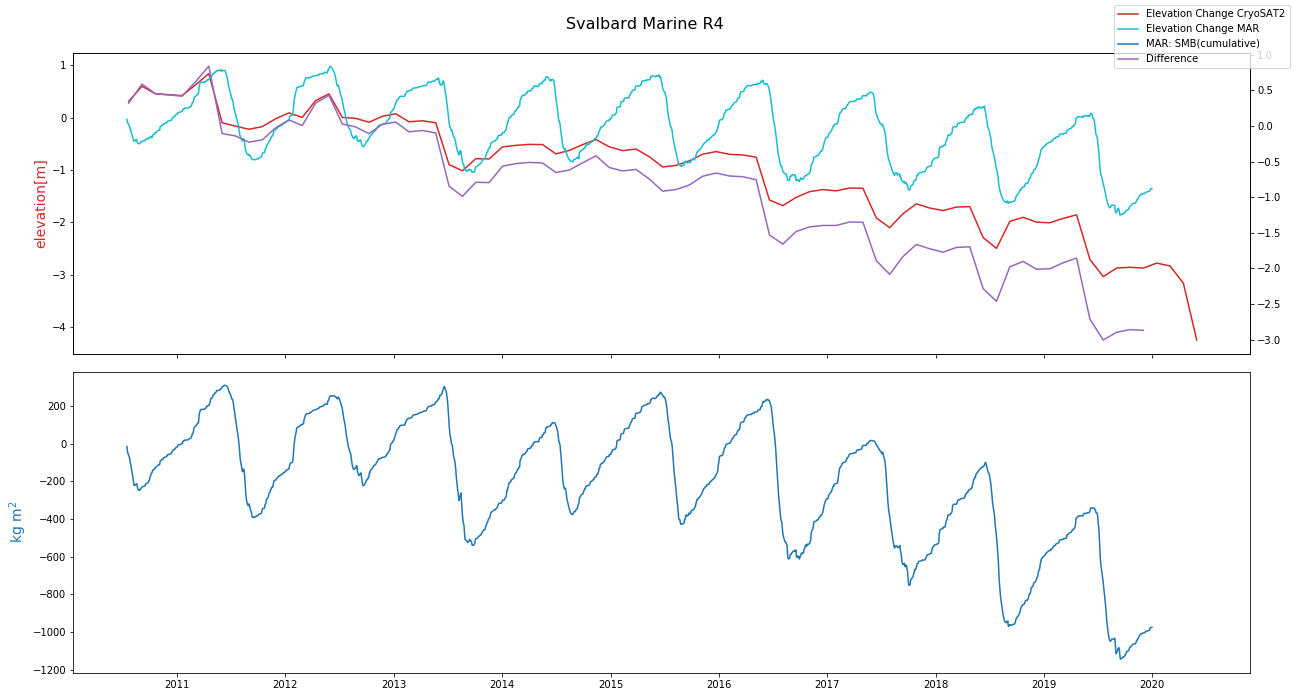

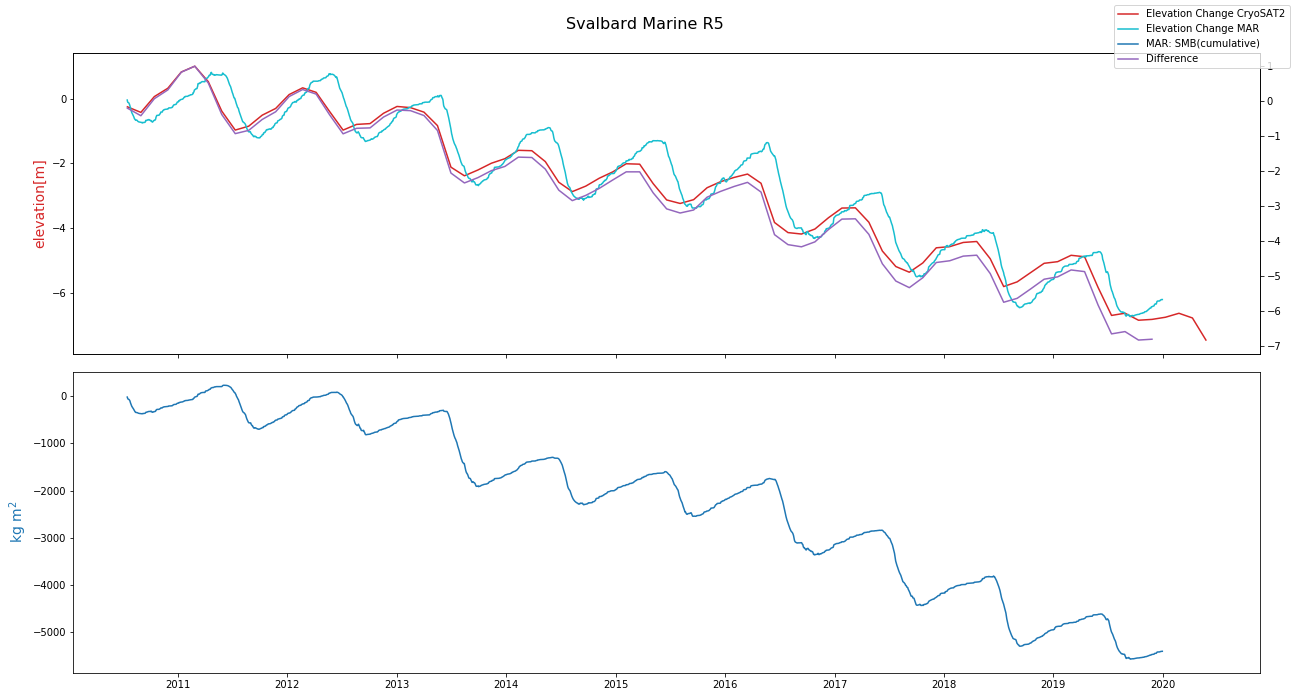

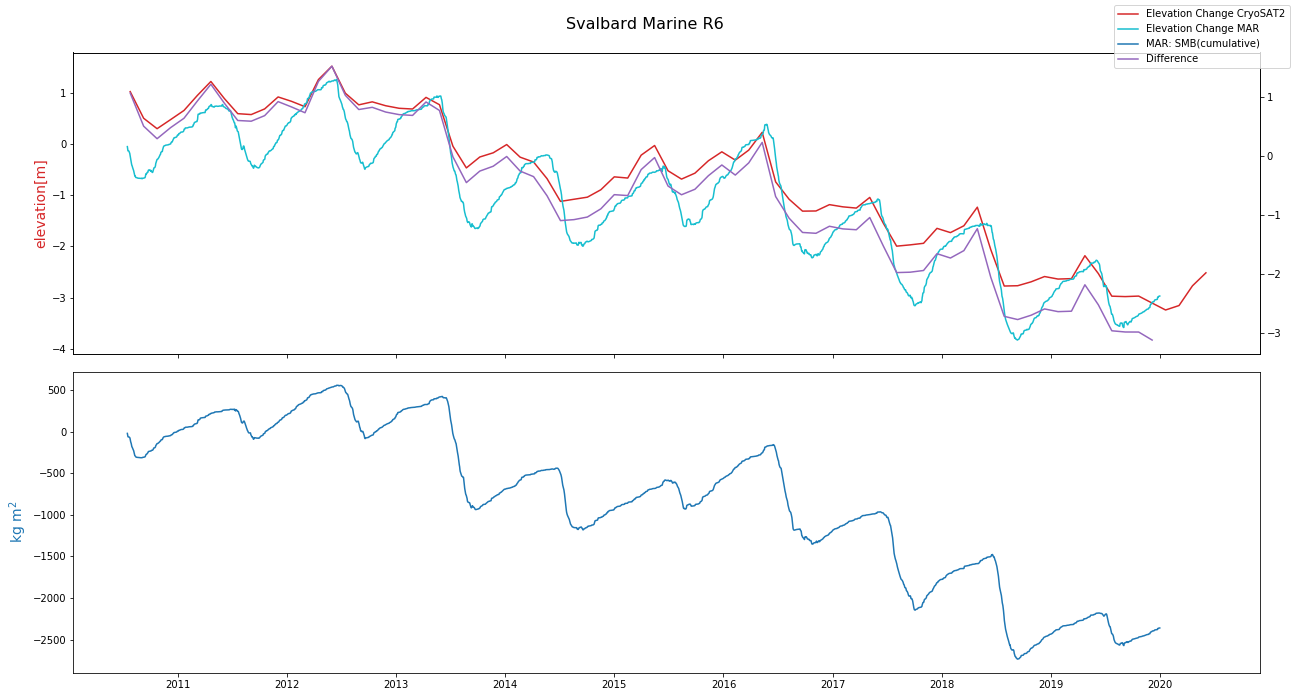

In [39]:
for i in range(2,7):
    MARplot_multi('/geos/d14/CS2/dhdt/Timeseries/Svalbard_MR'+str(i)+'_MF/tmsr_45_90_07_rgi60_Svalbard_corr_marine_R'+str(i)+'.mat','/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/Svalbard_Masked/Svalbard_MR'+str(i)+'.nc','Svalbard Marine R'+str(i),'Svalbard_SMBEVEL_MR'+str(i)+'.png')


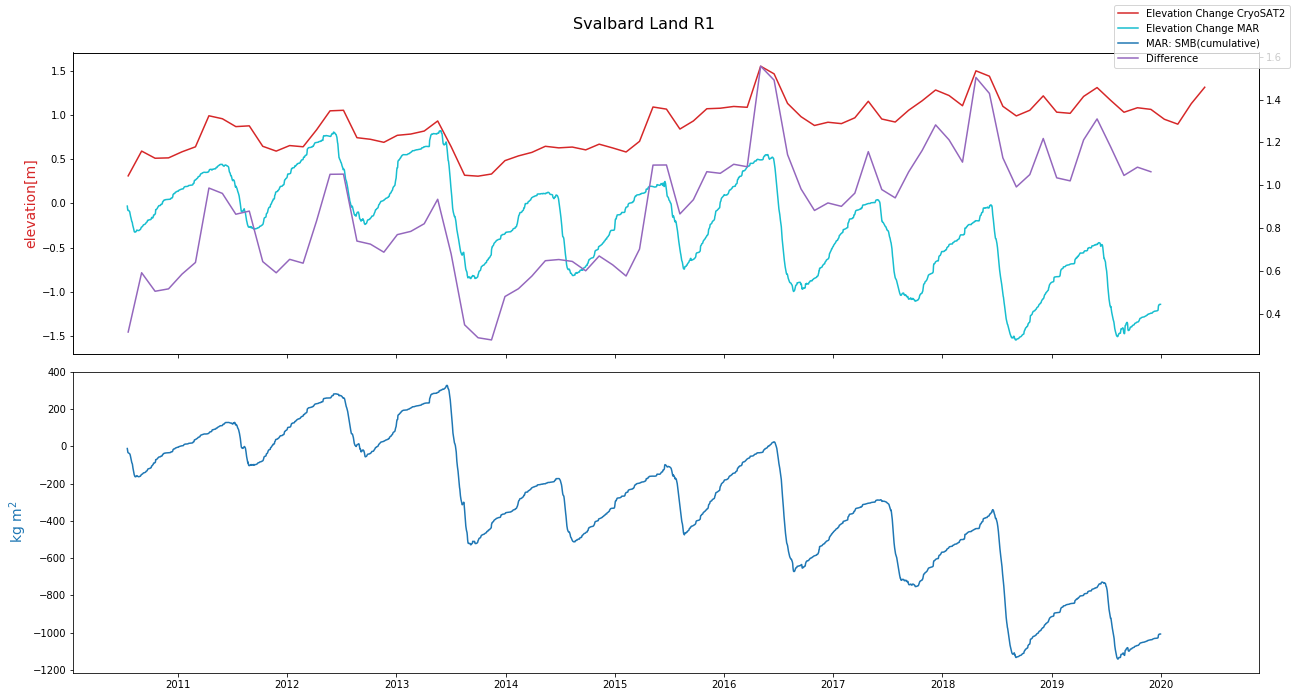

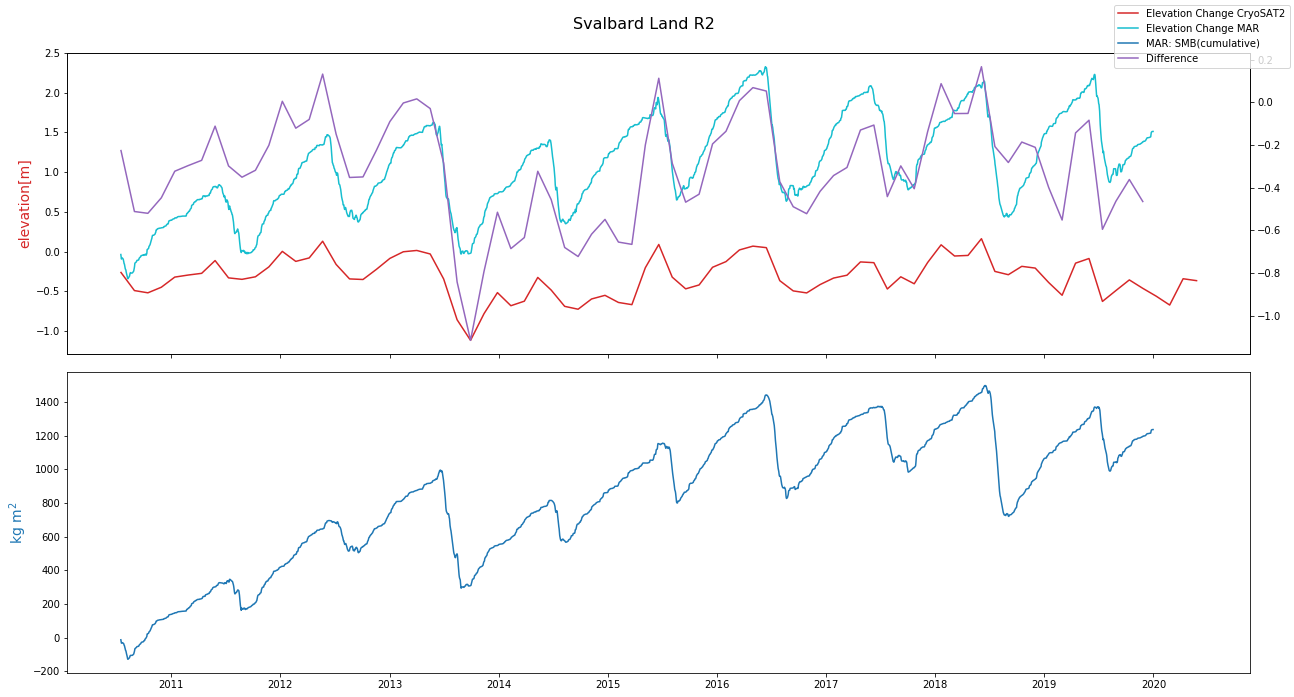

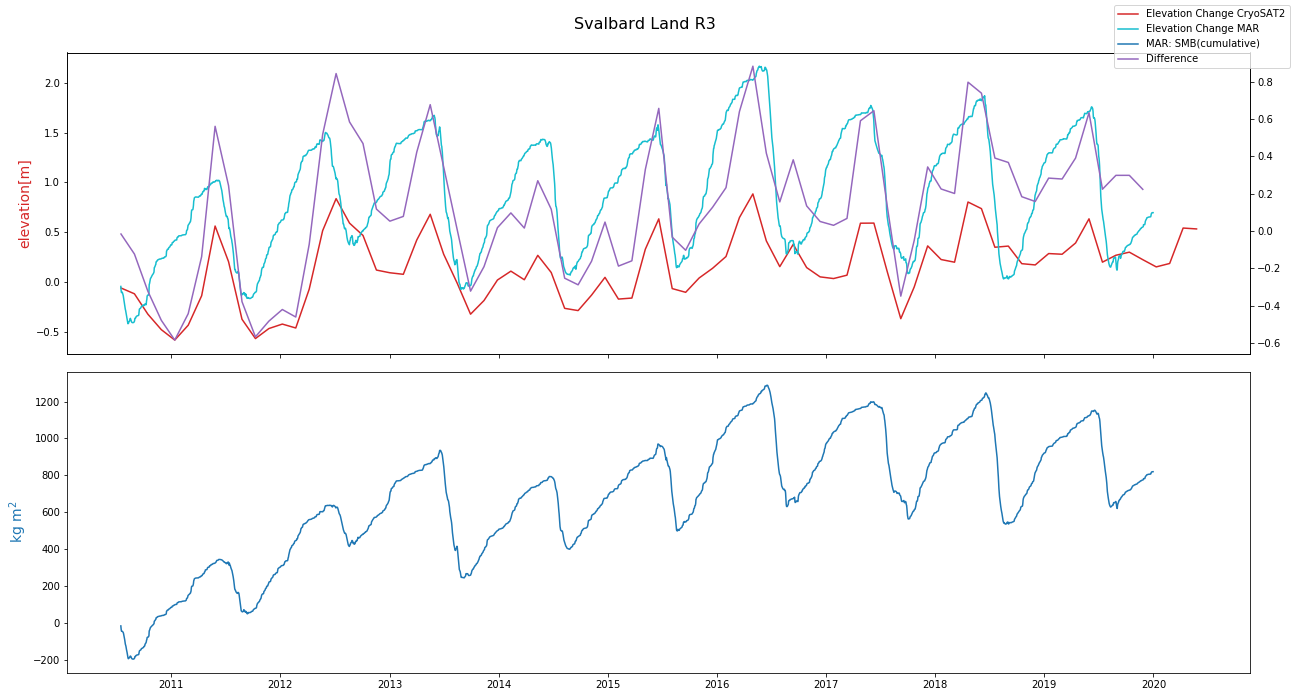

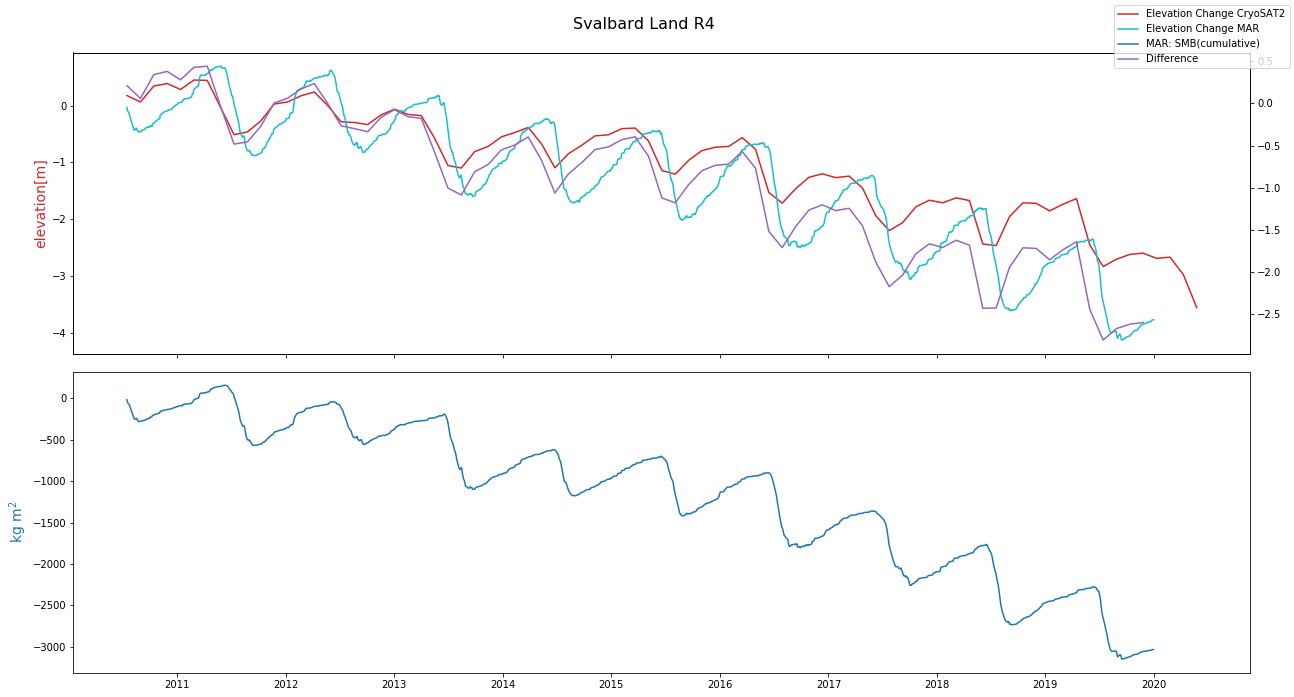

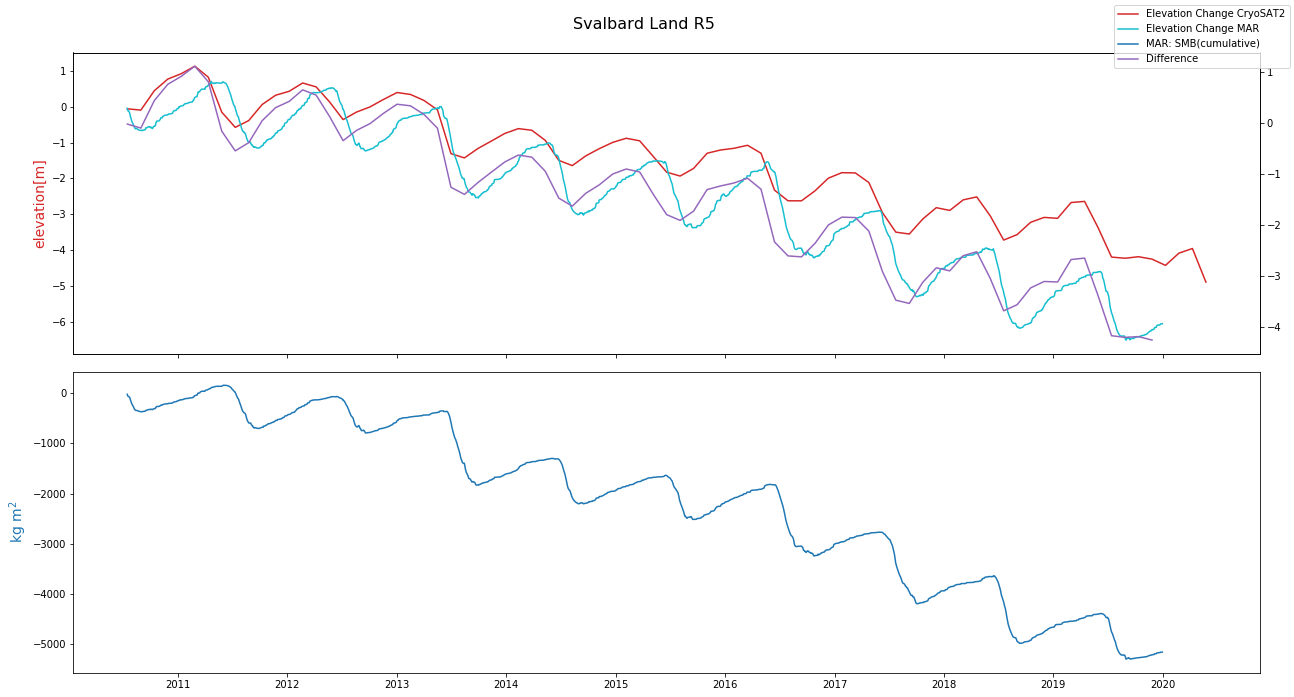

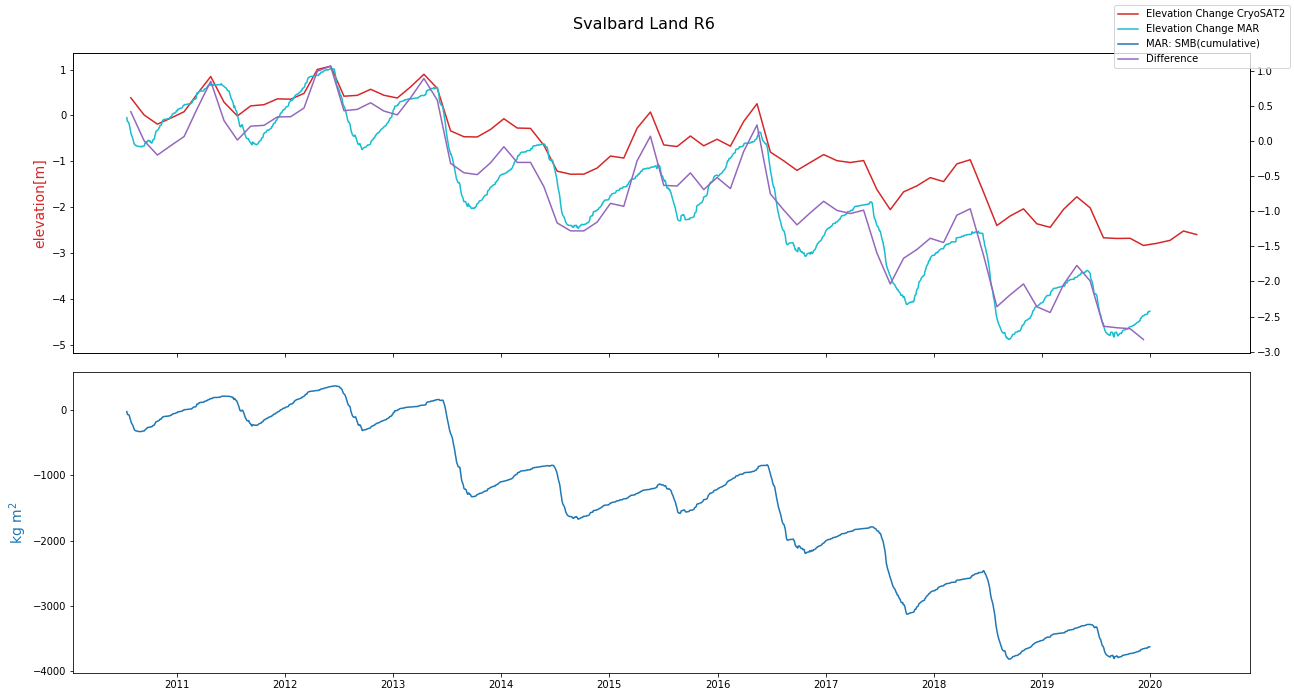

In [40]:
for i in range(1,7):
    MARplot_multi('/geos/d14/CS2/dhdt/Timeseries/Svalbard_LR'+str(i)+'_MF/tmsr_45_90_07_rgi60_Svalbard_corr_land_R'+str(i)+'.mat','/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/Svalbard_Masked/Svalbard_LR'+str(i)+'.nc','Svalbard Land R'+str(i),'Svalbard_SMBEVEL_LR'+str(i)+'.png')


In [71]:
def MARplot_multi(npng):
    fig, axes = plt.subplots(3,2,figsize=(18,10), sharex=True)
    
    for i in range(3):
        for j in range(2):
            ds= xr.open_dataset('/exports/csce/datastore/geos/groups/geos_EO/Databases/MAR/Svalbard-RA/Svalbard_Masked/Svalbard_LR'+str(1+i+j)+'.nc')
            ds['time']= pd.date_range('2001-01-01','2019-12-31')
            SMB= ds.smb_mean
            SH=ds.sh_mean

            matdata=io.loadmat('/geos/d14/CS2/dhdt/Timeseries/Svalbard_LR'+str(1+i+j)+'_MF/tmsr_45_90_07_rgi60_Svalbard_corr_land_R'+str(1+i+j)+'.mat')
            elevation = matdata['Tmsr'][0]
            t = matdata['time'][0]
            timepy= pd.to_datetime(t-719529, unit='D')
            E_ds = xr.Dataset(data_vars = dict(elev= (["t"],elevation)),coords=dict(t=timepy))

            labels = ['Elevation Change CryoSAT2','Elevation Change MAR']


            color = 'tab:red'
            color2 = 'tab:cyan'
            axes[i,j].plot(E_ds.t, E_ds.elev, color=color)
            axes[i,j].plot(SH.time.sel(time=slice('2010-07-16','2019-12-31')), SH.sel(time=slice('2010-07-16','2019-12-31')).cumsum(), color=color2)
            axes[i,j].legend(labels)
            axes[i, j].set_title('Region'+str(1+i+j))
    for ax in axes.flat:
        ax.set(xlabel='Time', ylabel='Elevation Change')
    for ax in axes.flat:
        ax.label_outer()
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.savefig(npng)
    plt.show()

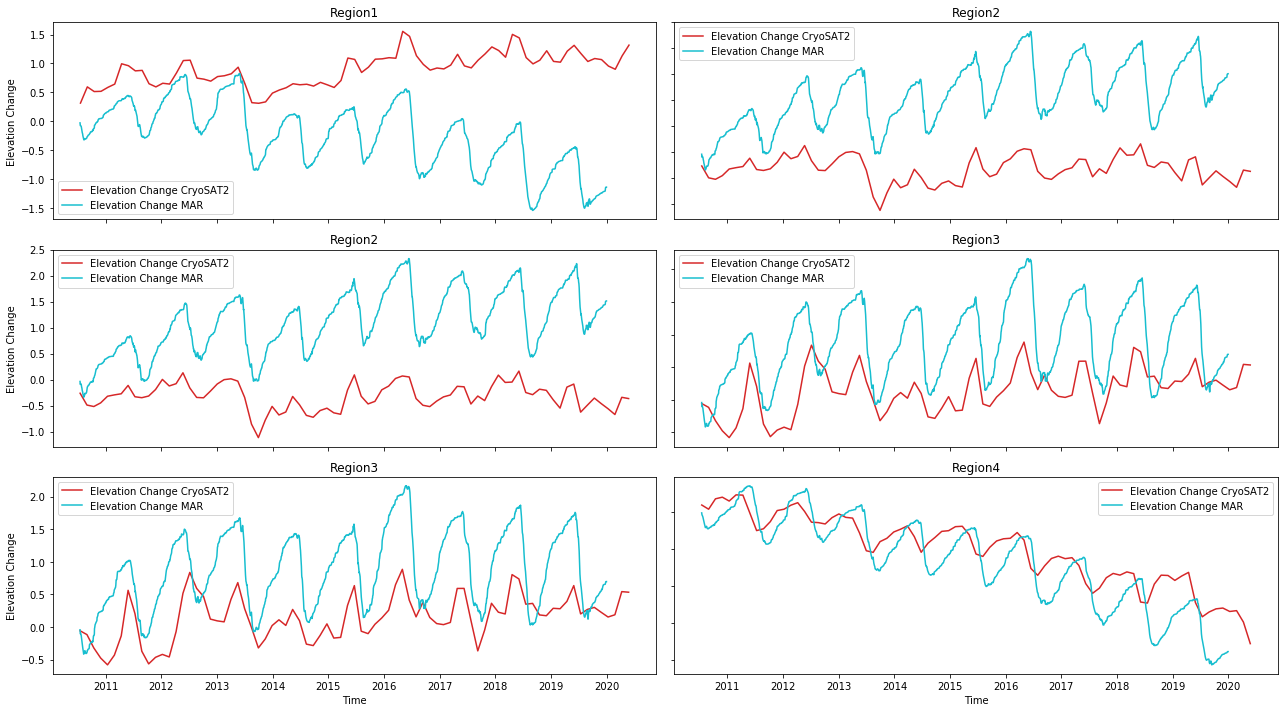

In [72]:
MARplot_multi('Svalbard_LELE.png')


In [50]:
range(2)

range(0, 2)